In [984]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [985]:
dftrain=pd.read_csv('train.csv', nrows=1000000)
dftest=pd.read_csv('test.csv', nrows=1000000)

In [986]:
dftrain.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [987]:
dftest.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


[Text(0,0.5,'log(Unique #)'),
 Text(0.5,0,'Category'),
 Text(0.5,1,'Number of Unique Values Per Category')]

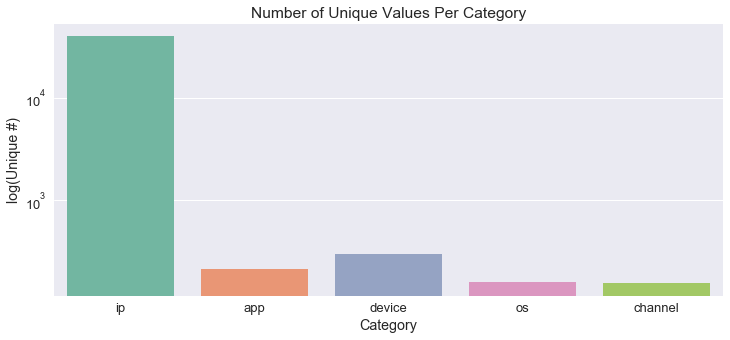

In [988]:
plt.figure(figsize=(12,5))
cols=['ip','app','device','os','channel']
#len()returns the number of items in an object
cate=[len(dftrain[col].unique()) for col in cols]
sns.set(font_scale=1.3)
ax=sns.barplot(cols, cate, palette="Set2", log=True)
ax.set(xlabel='Category',ylabel='log(Unique #)',title='Number of Unique Values Per Category')



[Text(0,0.5,'Probability'), Text(0.5,1,'Target value distribution')]

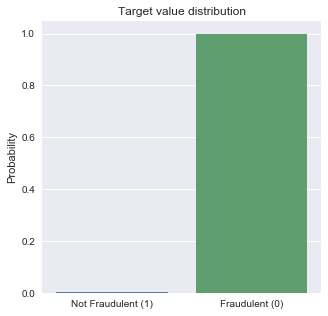

In [989]:
#percentage of fraudulent clicks
plt.figure(figsize=( 5 ,  5 ))
sns.set(font_scale= 1 )
mean = (dftrain.is_attributed.values ==  1 ).mean()
ax = sns.barplot([ 'Not Fraudulent (1)' ,  'Fraudulent (0)' ], [mean,  1-mean])
ax.set(ylabel= 'Probability' , title= 'Target value distribution' )


In [990]:
from sklearn.naive_bayes import BernoulliNB

In [991]:
(dftrain).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null int64
app                1000000 non-null int64
device             1000000 non-null int64
os                 1000000 non-null int64
channel            1000000 non-null int64
click_time         1000000 non-null object
attributed_time    1693 non-null object
is_attributed      1000000 non-null int64
dtypes: int64(6), object(2)
memory usage: 61.0+ MB


In [992]:
#pd.to_datetime?

In [993]:
#changing click_time to date time
dftrain['click_time']=pd.to_datetime(dftrain['click_time'])

In [994]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null int64
app                1000000 non-null int64
device             1000000 non-null int64
os                 1000000 non-null int64
channel            1000000 non-null int64
click_time         1000000 non-null datetime64[ns]
attributed_time    1693 non-null object
is_attributed      1000000 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 61.0+ MB


In [995]:
# adding a month column
dftrain['month'] = dftrain.click_time.dt.month

In [996]:
dftrain.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,11
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,11
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,11
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,11
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,11


In [997]:
#see how many is attributed in each month 
dftrain.groupby('month')['is_attributed'].count()

month
11    1000000
Name: is_attributed, dtype: int64

In [998]:
#adding a day column
dftrain['day'] = dftrain.click_time.dt.day

In [999]:
#see how many days are recorded
dftrain['day'].value_counts()

6    1000000
Name: day, dtype: int64

In [1000]:
#adding a hour column
dftrain['hour'] = dftrain.click_time.dt.hour

In [1001]:
dftrain.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day,hour
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,11,6,14
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,11,6,14
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,11,6,14
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,11,6,14
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,11,6,14


In [1002]:
#see how many hour time is recorded
dftrain.hour.value_counts()

16    999517
15       435
14        48
Name: hour, dtype: int64

In [1003]:
# see how many is attributed and not attributed in each hour
dftrain.groupby(['hour', 'is_attributed'])['is_attributed'].count()

hour  is_attributed
14    0                    48
15    0                   434
      1                     1
16    0                997825
      1                  1692
Name: is_attributed, dtype: int64

In [1004]:
#adding a minute column

dftrain['minute'] = dftrain.click_time.dt.minute

In [1005]:
dftrain.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day,hour,minute
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,11,6,14,32
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,11,6,14,33
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,11,6,14,34
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,11,6,14,34
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,11,6,14,35


In [1006]:
#dftrain.minute.value_counts()

In [1007]:
#dftrain.groupby(['minute', 'is_attributed'])['is_attributed'].count()

In [1008]:
#adding a "second" column
dftrain['second'] = dftrain.click_time.dt.second

In [1009]:
dftrain.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day,hour,minute,second
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,11,6,14,32,21
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,11,6,14,33,34
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,11,6,14,34,12
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,11,6,14,34,52
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,11,6,14,35,8


In [1010]:
hourcol=dftrain['hour']

In [1011]:
hourcol.max()

16

In [1012]:
hourcol.min()

14

In [1013]:
#see how many "second" time is recorded
#dftrain.second.value_counts()

In [1014]:
#dftrain.groupby(['second', 'is_attributed'])['is_attributed'].count()

In [1015]:
#dftrain.groupby(['ip', 'is_attributed'])['is_attributed'].count()

In [1016]:
#dftrain.groupby(['channel', 'is_attributed'])['is_attributed'].count()

In [1017]:
#dftrain.groupby(['app', 'is_attributed'])['is_attributed'].count()

In [1018]:
#dftrain.groupby(['device', 'is_attributed'])['is_attributed'].count()

Group by ip-day-hour Combination to compute the number of channels associated with a given IP address within each hour

In [1019]:
#find the same ip+day+hour, count different channels

ga = dftrain[['ip','day','hour','channel']].groupby(by=['ip','day','hour'])[['channel']].count().reset_index().rename(index=str, columns={'channel':'ip_day_hour_channelcount'})
#ga.sort_values('ip_day_hour_channelcount', ascending=False)

In [1020]:
#Grouping by ip-app Combination to compute the number of channels associated with a given IP address and app
gb =dftrain[['ip','app','channel']].groupby(by=['ip','app'])[['channel']].count().reset_index().rename(index=str, columns={'channel':'ip_app_channelcount'})
#gb.sort_values('ip_app_channelcount', ascending=False)

Combination of ip and channel. Count APP.
Find the number of apps used for the same ip to download same channel (ad)

In [1021]:
gc =dftrain[['ip','channel','app']].groupby(['ip','channel'])['app'].count().reset_index().rename(index=str, columns={'app':'ip_channel_appcount'})

gc.sort_values('ip_channel_appcount', ascending=False).head()


,ip,channel,ip_channel_appcount
170043,73516,153,835
169930,73487,153,807
170073,73516,326,751
169959,73487,326,721
389556,209663,205,659


In [1022]:
dftrain.loc[170043]

ip                               26411
app                                  2
device                               1
os                                  19
channel                            477
click_time         2017-11-06 16:03:10
attributed_time                    NaN
is_attributed                        0
month                               11
day                                  6
hour                                16
minute                               3
second                              10
Name: 170043, dtype: object

In [1023]:
#dftrain.loc[225080:225090]

In [1024]:
gd = dftrain[['ip','day','hour','minute','channel','app']].groupby(['ip','day','channel','app','hour'])['minute'].var().reset_index().rename(index=str, columns={'minute': 'minute_var'})
gd.sort_values('minute_var', ascending=False).head()


,ip,day,channel,app,hour,minute_var
2570,1025,6,379,3,15,800.0
214177,78349,6,379,3,15,722.0
349439,129614,6,379,3,15,612.5
457885,209663,6,379,3,15,364.5
297442,108942,6,379,3,15,343.7


In [1025]:
dftrain.loc[214177]

ip                               14782
app                                  2
device                               1
os                                  13
channel                            205
click_time         2017-11-06 16:04:08
attributed_time                    NaN
is_attributed                        0
month                               11
day                                  6
hour                                16
minute                               4
second                               8
Name: 214177, dtype: object

In [1026]:
#dftrain.loc[461882:461923]

All nonfradulent clicks

In [1027]:
all_real=dftrain[dftrain['is_attributed']==1]

In [1028]:
na = all_real[['ip','day','hour','channel']].groupby(by=['ip','day','hour'])[['channel']].count().reset_index().rename(index=str, columns={'channel':'count_channel'})
na.sort_values('count_channel', ascending=False).head()


,ip,day,hour,count_channel
376,73487,6,16,5
520,97716,6,16,4
377,73516,6,16,4
31,5348,6,16,4
1184,171575,6,16,3


In [1029]:
nb =all_real[['ip','app','channel']].groupby(by=['ip','app'])[['channel']].count().reset_index().rename(index=str, columns={'channel':'ip_app_channelcount'})


nb.sort_values('ip_app_channelcount', ascending=False).head()


,ip,app,ip_app_channelcount
391,73487,11,3
560,99977,35,2
641,110985,35,2
545,97716,9,2
32,5348,19,2


In [1030]:
nc =all_real[['ip','channel','day','hour','app']].groupby(['ip','channel','day','hour'])['app'].count().reset_index().rename(index=str, columns={'app':'ip_time_channel_appcount'})
nc.sort_values('ip_time_channel_appcount', ascending=False).head()


,ip,channel,day,hour,ip_time_channel_appcount
648,110985,21,6,16,2
23,4052,347,6,16,2
1510,197093,213,6,16,2
703,118324,21,6,16,2
672,113839,213,6,16,2


In [1031]:
nd = all_real[['ip','day','hour','minute','channel','app']].groupby(['ip','day','channel','app','hour'])['minute'].var().reset_index().rename(index=str, columns={'minute': 'minute_var'})
nd.sort_values('minute_var', ascending=False).head()

,ip,day,channel,app,hour,minute_var
704,118324,6,21,35,16,72.0
23,4052,6,347,19,16,50.0
567,99977,6,274,35,16,18.0
648,110985,6,21,35,16,18.0
0,39,6,213,19,16,NaN


Merge

In [1032]:
gc =dftrain[['ip','channel','app']].groupby(['ip','channel'])['app'].count().reset_index().rename(index=str, columns={'app':'ip_channel_appcount'})
dftrainM= pd.merge(dftrain,gc, on=['ip','channel'], how='left')



In [1033]:
ga = dftrain[['ip','day','hour','channel']].groupby(by=['ip','day','hour'])[['channel']].count().reset_index().rename(index=str, columns={'channel':'ip_day_hour_channelcount'})
dftrainM = pd.merge(dftrainM,ga, on=['ip','day','hour'], how='left')


In [1034]:
gb=dftrain[['ip','app','channel']].groupby(by=['ip','app'])[['channel']].count().reset_index().rename(index=str, columns={'channel':'ip_app_channelcount'})
dftrainM=pd.merge(dftrainM,gb, on=['ip','app'], how='left')

In [1035]:
dftrainM.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day,hour,minute,second,ip_channel_appcount,ip_day_hour_channelcount,ip_app_channelcount
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,11,6,14,32,21,3,1,19
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,11,6,14,33,34,3,1,23
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,11,6,14,34,12,2,1,10
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,11,6,14,34,52,4,1,69
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,11,6,14,35,8,1,1,1


Logistics regression

In [1081]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(class_weight = 'balanced')
x=dftrainM
y=dftrain['is_attributed']

In [1082]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [1083]:
x_train, x_test, y_train, y_test=train_test_split(x,y)

In [1084]:
x_train = x_train.drop('click_time', axis=1)
x_train.head()

,ip,app,device,os,channel,attributed_time,is_attributed,month,day,hour,minute,second,ip_channel_appcount,ip_day_hour_channelcount,ip_app_channelcount
14426,118881,1,1,28,134,NaN,0,11,6,16,0,19,3,17,1
21892,190870,1,1,19,134,NaN,0,11,6,16,0,28,5,15,2
557027,98454,18,1,19,134,NaN,0,11,6,16,11,17,16,136,13
818872,154850,6,1,20,459,NaN,0,11,6,16,17,32,2,11,2
26764,44410,8,1,18,140,NaN,0,11,6,16,0,33,5,105,7


In [1085]:
x_test = x_test.drop('click_time', axis=1)
x_test.head()

,ip,app,device,os,channel,attributed_time,is_attributed,month,day,hour,minute,second,ip_channel_appcount,ip_day_hour_channelcount,ip_app_channelcount
639978,208384,2,1,36,364,NaN,0,11,6,16,13,12,29,37,31
740945,71542,9,1,13,232,NaN,0,11,6,16,15,36,1,144,23
320920,126461,12,1,18,245,NaN,0,11,6,16,6,9,16,100,21
134922,1067,20,2,32,259,NaN,0,11,6,16,2,29,12,121,8
801739,54722,2,1,13,205,NaN,0,11,6,16,17,7,55,107,56


In [1086]:
x_train = x_train.drop('attributed_time', axis=1)
x_test=x_test.drop('attributed_time', axis=1)

x_train = x_train[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']]


In [1087]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [1088]:
predict=clf.predict(x_test[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']])

In [1089]:
predict[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [1090]:
predict[:-10]

array([0, 0, 0, ..., 0, 0, 0])

In [1091]:
y_test.head()

639978    0
740945    0
320920    0
134922    0
801739    0
Name: is_attributed, dtype: int64

In [1092]:
y_test.nlargest()

410394    1
111017    1
128921    1
226260    1
722195    1
Name: is_attributed, dtype: int64

In [1093]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       1.00      0.69      0.81    249551
          1       0.00      0.72      0.01       449

avg / total       1.00      0.69      0.81    250000



In [1049]:
clf.score(x_test[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']],y_test)

0.998076

KNeighborsClassifier

In [1050]:
from sklearn.neighbors import KNeighborsClassifier

In [1051]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [1052]:
kpredict=knn.predict(x_test[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']])

In [1094]:
from sklearn.model_selection import GridSearchCV

In [1095]:
#parameters we search
params = {'n_neighbors': [2, 3, 4, 7, 10, 20]}

In [1096]:
#grid containing model and parameters
grid = GridSearchCV(knn, param_grid=params)

In [1097]:
#fit the grid search
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 7, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1098]:
#get the best estimator
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [1053]:
kpredict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1054]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    249519
          1       0.00      0.00      0.00       481

avg / total       1.00      1.00      1.00    250000



/Users/zhangxueting/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1055]:
knn.score(x_test[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']],y_test)

0.998076

Decision Tree

In [1056]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1057]:
tree_predict=tree.predict(x_test[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']])

In [1058]:
predict


array([0, 0, 0, ..., 0, 0, 0])

In [1059]:
import numpy as np

In [1060]:
np.max(tree_predict)

1

In [1061]:
print(classification_report(y_test, tree_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    249519
          1       0.31      0.25      0.28       481

avg / total       1.00      1.00      1.00    250000



In [1062]:
tree.score(x_test[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']],y_test)

0.997484

In [1063]:
tree_predict=tree.predict(x_test[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']])

In [1064]:
x.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day,hour,minute,second,ip_channel_appcount,ip_day_hour_channelcount,ip_app_channelcount
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,11,6,14,32,21,3,1,19
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,11,6,14,33,34,3,1,23
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,11,6,14,34,12,2,1,10
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,11,6,14,34,52,4,1,69
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,11,6,14,35,8,1,1,1


Tree has highest score--On test data

In [1065]:
x=x.drop('click_time', axis=1)

In [1066]:
x.head()

,ip,app,device,os,channel,attributed_time,is_attributed,month,day,hour,minute,second,ip_channel_appcount,ip_day_hour_channelcount,ip_app_channelcount
0,83230,3,1,13,379,NaN,0,11,6,14,32,21,3,1,19
1,17357,3,1,19,379,NaN,0,11,6,14,33,34,3,1,23
2,35810,3,1,13,379,NaN,0,11,6,14,34,12,2,1,10
3,45745,14,1,13,478,NaN,0,11,6,14,34,52,4,1,69
4,161007,3,1,13,379,NaN,0,11,6,14,35,8,1,1,1


In [1067]:
x=x.drop('second', axis=1)
x=x.drop('minute', axis=1)
x=x.drop('attributed_time', axis=1)

In [1068]:
x = x[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']]

In [1069]:
tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1070]:
dftest.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [1071]:
dftest['click_time']=pd.to_datetime(dftest['click_time'])

In [1072]:
# adding a month column
dftest['month'] = dftest.click_time.dt.month
#adding a day column
dftest['day'] = dftest.click_time.dt.day
#adding a hour column
dftest['hour'] = dftest.click_time.dt.hour



In [1073]:
dftest_drop=dftest.drop('click_time',axis=1)

In [1074]:
ta=dftest[['ip','day','hour','channel']].groupby(by=['ip','day','hour'])[['channel']].count().reset_index().rename(index=str, columns={'channel':'ip_day_hour_channelcount'})
dftestM = pd.merge(dftest_drop,ta, on=['ip','day','hour'], how='left')

tb=dftest[['ip','app','channel']].groupby(by=['ip','app'])[['channel']].count().reset_index().rename(index=str, columns={'channel':'ip_app_channelcount'})
dftestM=pd.merge(dftestM,tb, on=['ip','app'], how='left')

tc=dftest[['ip','channel','app']].groupby(['ip','channel'])['app'].count().reset_index().rename(index=str, columns={'app':'ip_channel_appcount'})
dftestM= pd.merge(dftestM,tc, on=['ip','channel'], how='left')


In [1075]:
dftestM.nlargest(columns='hour',n=10)

,click_id,ip,app,device,os,channel,month,day,hour,ip_day_hour_channelcount,ip_app_channelcount,ip_channel_appcount
0,0,5744,9,1,3,107,11,10,4,12,2,1
1,1,119901,9,1,3,466,11,10,4,135,16,4
2,2,72287,21,1,19,128,11,10,4,76,4,3
3,3,78477,15,1,13,111,11,10,4,65,4,1
4,4,123080,12,1,13,328,11,10,4,17,2,1
5,5,110769,18,1,13,107,11,10,4,39,5,3
6,6,12540,3,1,1,137,11,10,4,30,6,1
7,7,88637,27,1,19,153,11,10,4,41,1,1
8,9,14932,18,1,10,107,11,10,4,32,4,1
9,8,123701,12,1,53,424,11,10,4,113,14,1


In [1076]:
x.head()

,ip,day,hour,channel,ip_channel_appcount,ip_day_hour_channelcount,ip_app_channelcount
0,83230,6,14,379,3,1,19
1,17357,6,14,379,3,1,23
2,35810,6,14,379,2,1,10
3,45745,6,14,478,4,1,69
4,161007,6,14,379,1,1,1


In [1077]:
real_treepredict=tree.predict(dftestM[['ip','day','hour','channel','ip_channel_appcount','ip_day_hour_channelcount','ip_app_channelcount']])

In [1078]:
print(real_treepredict[(len(real_treepredict)-500):])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [1079]:
np.max(real_treepredict)

1